In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [ ]:
df = pd.read_csv('shopEasy.csv')
df

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.000000,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.000000,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.250000,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.000000,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.000000,6,New York,Premium,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C15731,2901.999862,1.000000,11250.65,10165.88,1084.77,0.000000,1.000000,1.000000,0.750000,...,0,274,9500.0,6443.381719,691.328423,0.083333,12,Chicago,Student,59
8946,C17471,25.998310,0.454545,398.57,111.24,287.33,0.000000,0.333333,0.083333,0.250000,...,0,4,2500.0,821.069037,132.906041,0.800000,12,New York,Premium,17
8947,C15535,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,...,5,0,3500.0,310.775643,659.586136,0.000000,12,Los Angeles,Student,54
8948,C13135,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,...,3,3,3000.0,577.725789,1683.482088,0.000000,12,Los Angeles,Premium,59


General information about the dataset and the value ranges of each column.

In [ ]:
df.head(), df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

(  personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
 0   C10573   1034.660626        0.833333    1308.11          1308.11   
 1   C16889    777.853474        0.666667       0.00             0.00   
 2   C12964     97.453056        0.818182     334.73           334.73   
 3   C11171      0.000000        0.000000      12.65             0.00   
 4   C17582     18.120946        0.500000      57.00            57.00   
 
    multipleItemCosts  emergencyFunds  itemBuyFrequency  \
 0               0.00      234.602843          0.500000   
 1               0.00     1820.143378          0.000000   
 2               0.00       19.551802          0.083333   
 3              12.65        0.000000          0.083333   
 4               0.00        0.000000          0.166667   
 
    singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
 0                0.500000                  0.000000  ...               1   
 1                0.000000                  0.0000

# Preprocessing


### Dealing with missing values and duplicates

Counting number of **null values** in the dataframe, checking if there are null values. There are 314 nulls.

In [ ]:
total_null_count = df.isnull().sum().sum()
print("Total number of null values in DataFrame:", total_null_count)

Total number of null values in DataFrame: 314


Checking which columns have the missing values and how many missing values are in those columns. MaxSpendLimit has 1 missing value, and leastAmountPaid has 313 missing.

In [ ]:
missing_values_mask = df.isnull()
missing_values_by_column = missing_values_mask.sum()
columns_with_missing_values = missing_values_by_column[missing_values_by_column > 0]
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
maxSpendLimit        1
leastAmountPaid    313
dtype: int64


Counting the number of duplicate rows in the dataframe. The result is there are 0 duplicates.

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicates in DataFrame:", duplicate_count)

Number of duplicates in DataFrame: 0


**Imputing** NA values of columns 'maxSpendLimit' and 'leastAmountPaid' with **median** values of those columns.

In [ ]:
df['maxSpendLimit'] = df['maxSpendLimit'].fillna(df['maxSpendLimit'].median())
df['leastAmountPaid'] = df['leastAmountPaid'].fillna(df['leastAmountPaid'].median())

Checking success of the imputation, counting number of null values left after the imputation. The result is 0, meaning there are no null values left and the imputation is sucessful.

In [ ]:
total_null_count = df.isnull().sum().sum()
print("Total number of null values in DataFrame:", total_null_count)

Total number of null values in DataFrame: 0


### One-hot encoding of object columns
One-hot encoding is used to transform categorical data into dummy variables that can be used by machine learning algorithms. Some algorithms require numerical input, therefore one-hot encoding is necessary.

Counting number of unique values in the columns with the type 'object'.

In [ ]:
object_columns = df.select_dtypes(include=['object'])

unique_value_counts = object_columns.nunique()

print("Number of unique values in object columns:")
print(unique_value_counts)

Number of unique values in object columns:
personId       8950
location          3
accountType       3
dtype: int64


Showing the unique values of the object type columns. The personID column's every value is unique because it is ID. Location has 3 unique values: New York, Los Angeles, Chicago. AccountType has 3 unique values: "Premium, Student, Regular".
Columns 'location' and 'accountType' are suitable for one-hot encoding, as they only have 3 unique values.

In [ ]:
object_columns = df.select_dtypes(include=['object'])

unique_values = object_columns.apply(lambda col: col.unique())

print("Unique values in object columns:")
print(unique_values)

Unique values in object columns:
personId       [C10573, C16889, C12964, C11171, C17582, C1219...
location                        [New York, Los Angeles, Chicago]
accountType                          [Premium, Student, Regular]
dtype: object


Transforming columns 'location' and 'accountType' into dummy variables using pd.get_dummies. The resulting transformation is stored in encoded_df.

In [ ]:
encoded_df = pd.get_dummies(df, columns=['location', 'accountType'])

print(encoded_df)

     personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0      C10573   1034.660626        0.833333    1308.11          1308.11   
1      C16889    777.853474        0.666667       0.00             0.00   
2      C12964     97.453056        0.818182     334.73           334.73   
3      C11171      0.000000        0.000000      12.65             0.00   
4      C17582     18.120946        0.500000      57.00            57.00   
...       ...           ...             ...        ...              ...   
8945   C15731   2901.999862        1.000000   11250.65         10165.88   
8946   C17471     25.998310        0.454545     398.57           111.24   
8947   C15535   1859.165344        1.000000       0.00             0.00   
8948   C13135   2931.237524        1.000000     150.00           150.00   
8949   C16790    905.771358        1.000000     116.15            36.15   

      multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0                  0.00      234.60284

Dropping "personId" column because it is irrelevant. Converting boolean variables into integer. This ensures compatibility with algorithms and enhances computational efficiency.

In [ ]:
encoded_df.drop(columns='personId', inplace=True)
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'bool':
        encoded_df[col] = encoded_df[col].astype(int)

In [ ]:
encoded_df

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_Premium,accountType_Regular,accountType_Student
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,207.007715,0.000000,6,60,0,0,1,1,0,0
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,173.276205,0.000000,6,5,0,1,0,1,0,0
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,117.297542,0.250000,12,21,0,0,1,0,0,1
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,...,312.343947,0.000000,12,53,1,0,0,1,0,0
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,54.138711,0.000000,6,59,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,2901.999862,1.000000,11250.65,10165.88,1084.77,0.000000,1.000000,1.000000,0.750000,0.000000,...,691.328423,0.083333,12,59,1,0,0,0,0,1
8946,25.998310,0.454545,398.57,111.24,287.33,0.000000,0.333333,0.083333,0.250000,0.000000,...,132.906041,0.800000,12,17,0,0,1,1,0,0
8947,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,0.083333,...,659.586136,0.000000,12,54,0,1,0,0,0,1
8948,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,...,1683.482088,0.000000,12,59,0,1,0,1,0,0


Transforming all columns into 'float' type. Describing data for analysis.

In [ ]:
encoded_df = encoded_df.astype(float)
encoded_df.describe()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_Premium,accountType_Regular,accountType_Student
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,844.906767,0.153715,11.517318,49.422570,0.334302,0.330838,0.334860,0.335196,0.334637,0.330168
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,2332.792322,0.292499,1.338331,28.808219,0.471772,0.470541,0.471968,0.472085,0.471890,0.470300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,170.857654,0.000000,12.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,312.343947,0.000000,12.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,788.713501,0.142857,12.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,76406.207520,1.000000,12.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Removing outliers.**

Created a function remove_putliers that removes values that are below Q1 - 1.5 * IQR (lower bound) and above Q3 + 1.5 * IQR (upper bound), where Q1 is the 15th percentile and Q3 is the 65th percentile of the column's distribution. These values are considered outliers according to the standard outlier detection method based on the IQR. Removing outliers is essential to ensure the precision and dependability of statistical analyses or machine learning models trained on the data.

We store data without outliers in df, because in some cases we need the outliers present to analyze the data.

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.15)
        Q3 = df[col].quantile(0.65)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
columns = encoded_df.columns
df = remove_outliers(encoded_df, columns)
df.describe()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_Premium,accountType_Regular,accountType_Student
count,388.000000,388.000000,388.000000,388.0,388.000000,388.000000,388.000000,388.0,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.0,388.000000,388.000000,388.000000,388.0,388.000000
mean,370.380698,0.733349,134.363582,0.0,134.536263,114.397884,0.385171,0.0,0.366406,0.036039,...,216.256719,0.069869,11.762887,50.641753,0.0,0.518041,0.481959,0.530928,0.0,0.469072
std,521.348534,0.339295,139.665105,0.0,139.579595,252.771092,0.365842,0.0,0.356191,0.055083,...,129.677515,0.127067,0.689878,28.166963,0.0,0.500320,0.500320,0.499687,0.0,0.499687
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.113027,0.000000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,11.651029,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,125.062405,0.000000,12.000000,26.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,59.464917,1.000000,92.720000,0.0,93.420000,0.000000,0.333333,0.0,0.250000,0.000000,...,182.700930,0.000000,12.000000,53.500000,0.0,1.000000,0.000000,1.000000,0.0,0.000000
75%,771.347551,1.000000,233.295000,0.0,233.295000,78.995683,0.666667,0.0,0.666667,0.083333,...,312.343947,0.100000,12.000000,74.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000
max,2075.870968,1.000000,500.000000,0.0,500.000000,1371.216719,1.000000,0.0,1.000000,0.181818,...,567.761469,0.454545,12.000000,99.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000


Data without outliers is significantly smaller, having only 388 rows where original dataset had 8950.

In [ ]:
num_rows = df.shape[0]
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 388


# Data Visualisation

Visulize the distribution of accountTotal, where x axis is accountTotal values and y axis is their frequency in the dataset. This histogram shows that most customers have low account balances, with the frequency decreasing as account values increase, indicating a right-skewed distribution.

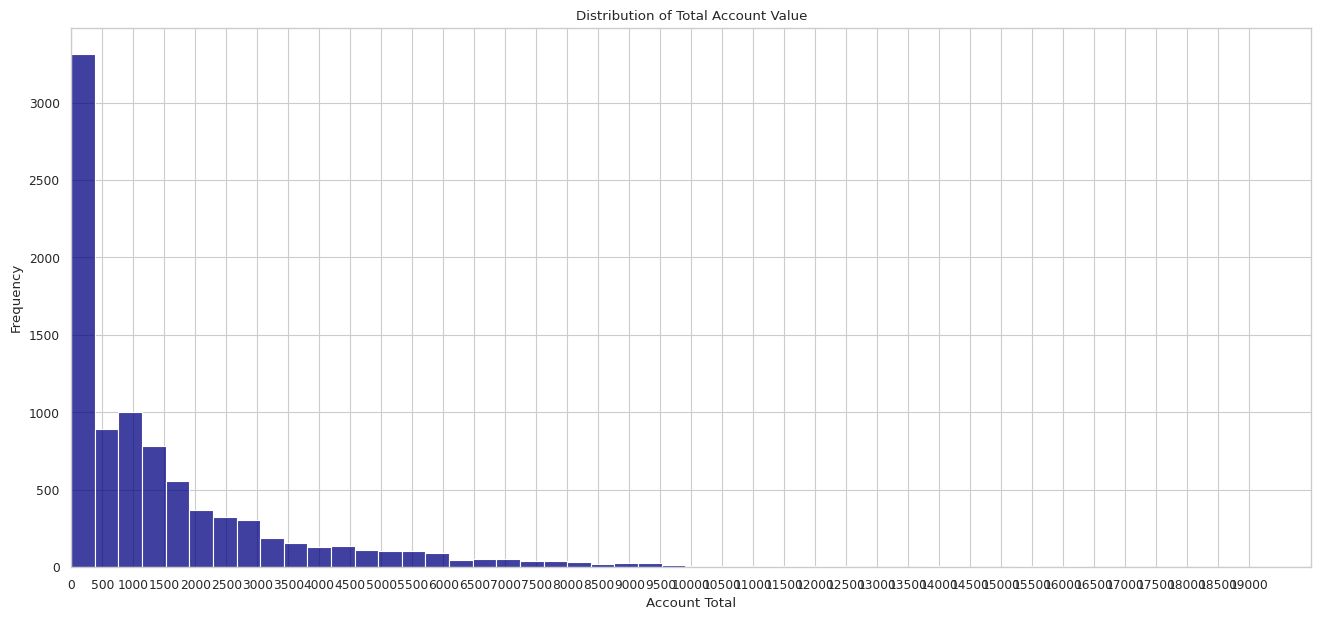

In [ ]:
#Plot distribution of total account value
plt.figure(figsize=(16, 7))

# Histogram using sns
sns.histplot(encoded_df['accountTotal'], bins=50, kde=False, color='navy')

# Title and labels
plt.title('Distribution of Total Account Value')
plt.xlabel('Account Total')
plt.ylabel('Frequency')

plt.xticks(range(0, int(encoded_df['accountTotal'].max()) + 1, 500))
plt.gca().set_xlim(left=0)

plt.show()

This bar chart shows the distribution of ShopEasy customers across Chicago, Los Angeles, and New York, indicating a nearly equal presence in these cities with customer counts around 3000 in each location.

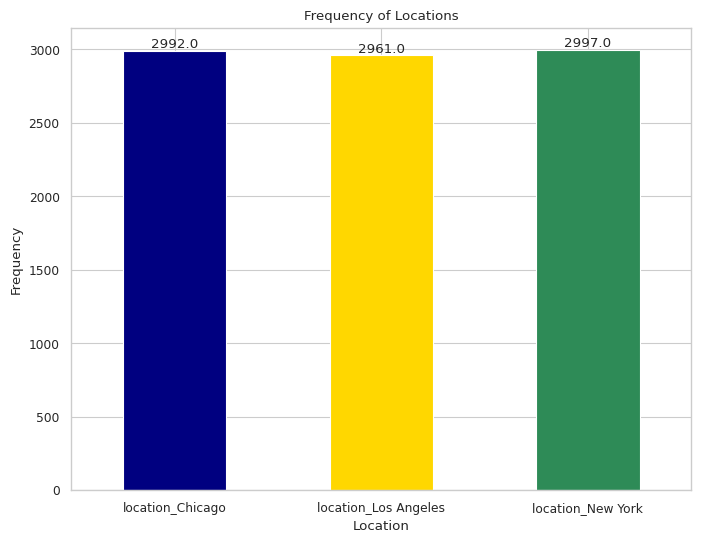

In [ ]:
# Bar plot for location frequency
location_counts = encoded_df[['location_Chicago', 'location_Los Angeles', 'location_New York']].sum()
plt.figure(figsize=(8, 6))
location_counts.plot(kind='bar', color=['navy', 'gold', 'seagreen'])
for index, value in enumerate(location_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.title('Frequency of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

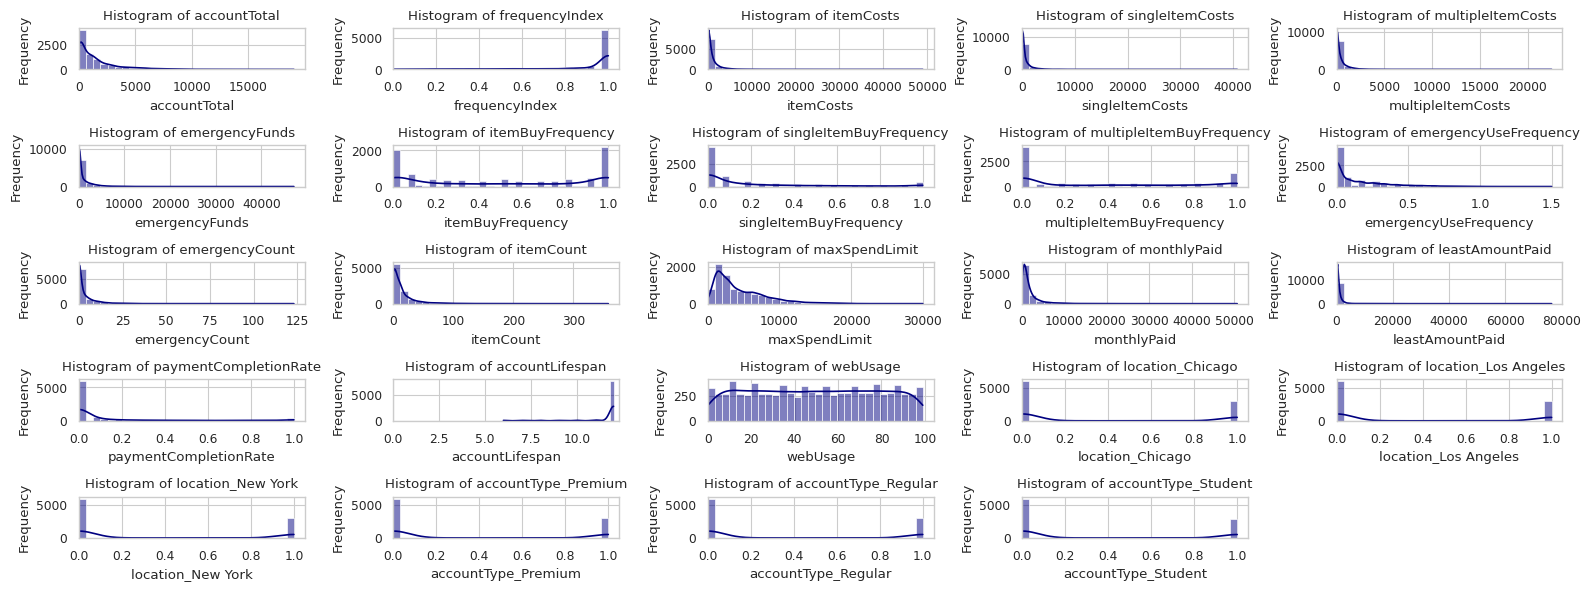

In [ ]:
numeric_cols = encoded_df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(16, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(encoded_df[col], kde=True, bins=30, color='navy')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.gca().set_xlim(left=0)
    plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

This collection of histograms provides a visual analysis of various numerical metrics from ShopEasy's dataset, showing distributions for account totals, emergency funds, transaction frequencies, and more, highlighting diverse customer behaviors and financial engagements.

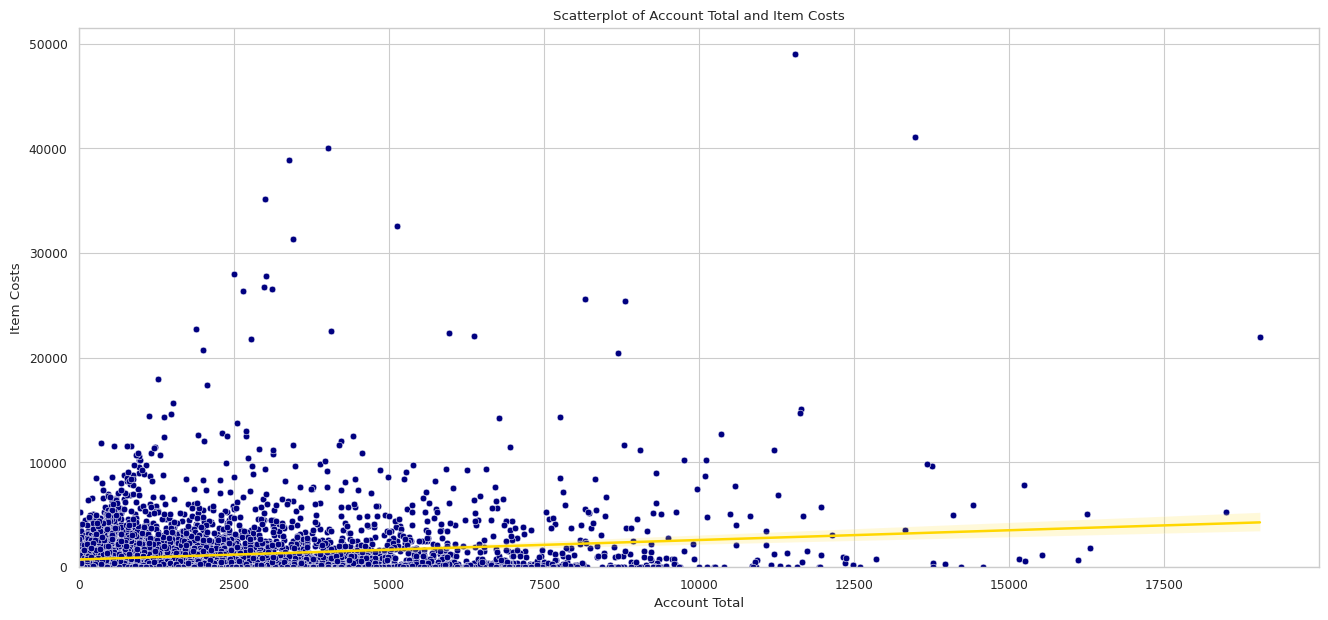

In [ ]:
sns.set_context("paper")
sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))
sns.scatterplot(x='accountTotal', y='itemCosts', data=encoded_df, color='navy')
sns.regplot(x='accountTotal', y='itemCosts', data=encoded_df, scatter=False, color='gold')
plt.xlabel('Account Total')
plt.ylabel('Item Costs')
plt.title('Scatterplot of Account Total and Item Costs')
plt.gca().set_xlim(left=0)
plt.ylim(bottom=0)
plt.show()

This scatterplot with regression line shows the relationship between account total and item costs for ShopEasy customers, indicating a general trend where higher account totals do not necessarily correlate with higher item costs.

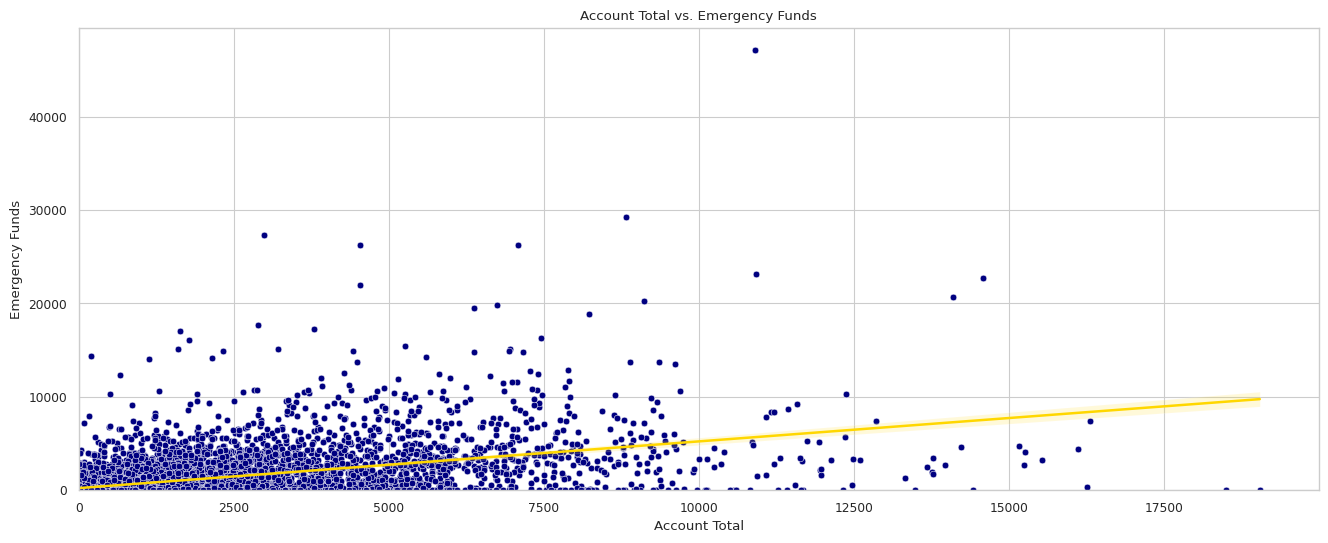

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='accountTotal', y='emergencyFunds', data=encoded_df, color='navy')
sns.regplot(x='accountTotal', y='emergencyFunds', data=encoded_df, scatter=False, color='gold')
plt.title('Account Total vs. Emergency Funds')
plt.xlabel('Account Total')
plt.ylabel('Emergency Funds')
plt.gca().set_xlim(left=0)
plt.ylim(bottom=0)
plt.show()

This scatterplot with a regression line illustrates the relationship between account totals and emergency funds among ShopEasy customers, showing a moderate positive correlation where customers with higher account balances tend to have more in emergency funds.

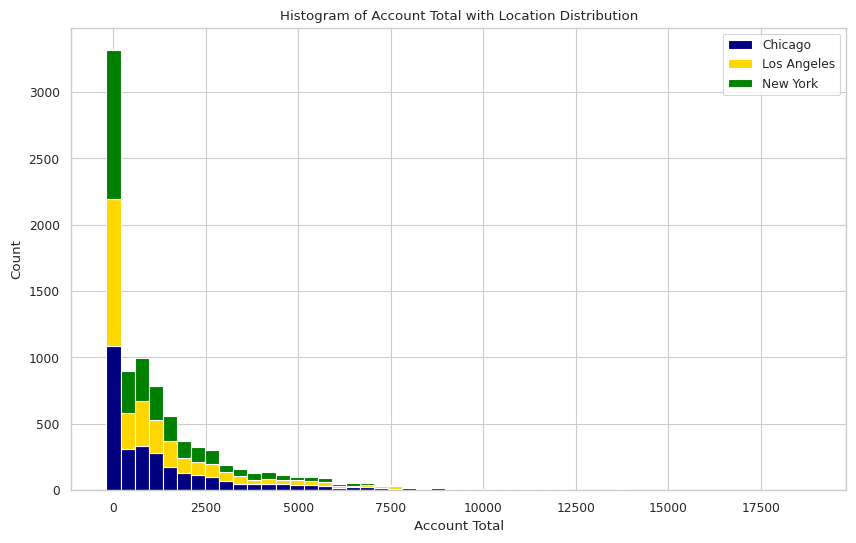

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# Assuming you have already imported seaborn and have your data ready
# Let's assume encoded_df contains 'accountTotal' and one-hot encoded location columns

# Define the number of bins
num_bins = 50

# Define the bin edges
bin_edges = np.linspace(encoded_df['accountTotal'].min(), encoded_df['accountTotal'].max(), num_bins + 1)

# Initialize arrays to store the counts for each location within each bin
counts_chicago = np.zeros(num_bins)
counts_los_angeles = np.zeros(num_bins)
counts_new_york = np.zeros(num_bins)

# Iterate over the bins and calculate the counts for each location
for i in range(num_bins):
    bin_mask = (encoded_df['accountTotal'] >= bin_edges[i]) & (encoded_df['accountTotal'] < bin_edges[i+1])
    counts_chicago[i] = encoded_df.loc[bin_mask, 'location_Chicago'].sum()
    counts_los_angeles[i] = encoded_df.loc[bin_mask, 'location_Los Angeles'].sum()
    counts_new_york[i] = encoded_df.loc[bin_mask, 'location_New York'].sum()

# Create the histogram with stacked bars
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts_chicago, color='navy', label='Chicago', width=(bin_edges[1] - bin_edges[0]))
plt.bar(bin_edges[:-1], counts_los_angeles, bottom=counts_chicago, color='gold', label='Los Angeles', width=(bin_edges[1] - bin_edges[0]))
plt.bar(bin_edges[:-1], counts_new_york, bottom=counts_chicago+counts_los_angeles, color='green', label='New York', width=(bin_edges[1] - bin_edges[0]))

# Set labels and title
plt.title('Histogram of Account Total with Location Distribution')
plt.xlabel('Account Total')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

This histogram displays the distribution of account totals for ShopEasy customers in Chicago (blue), Los Angeles (yellow), and New York (green), showing that lower account totals are more common across all locations, with a significant concentration in the lowest bin.

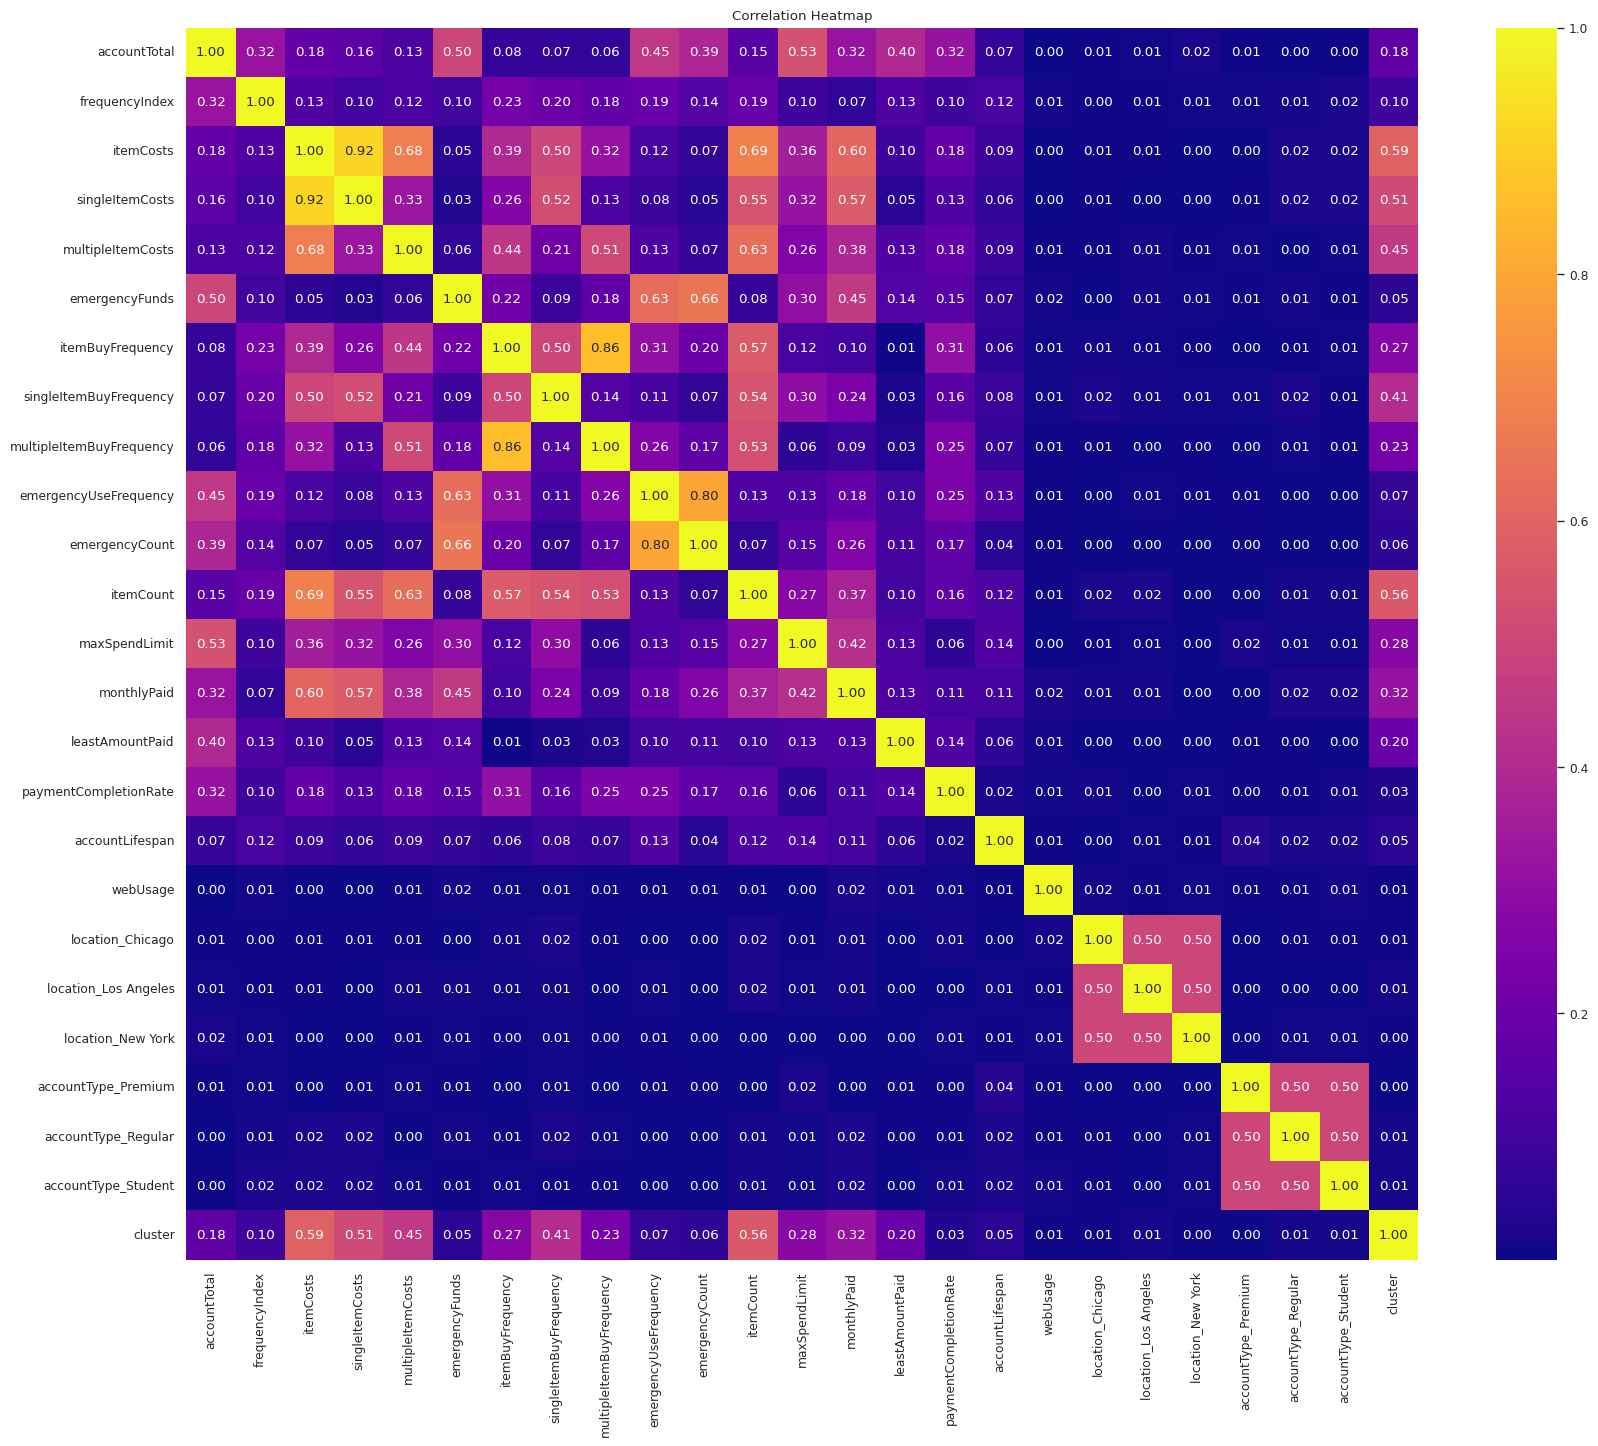

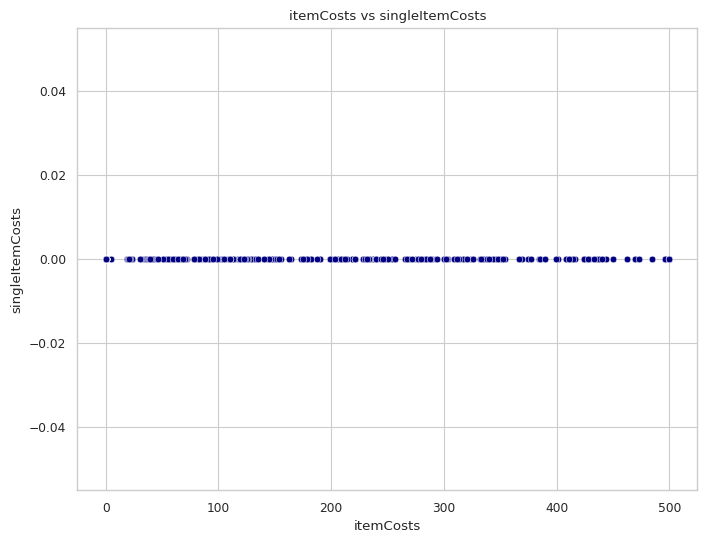

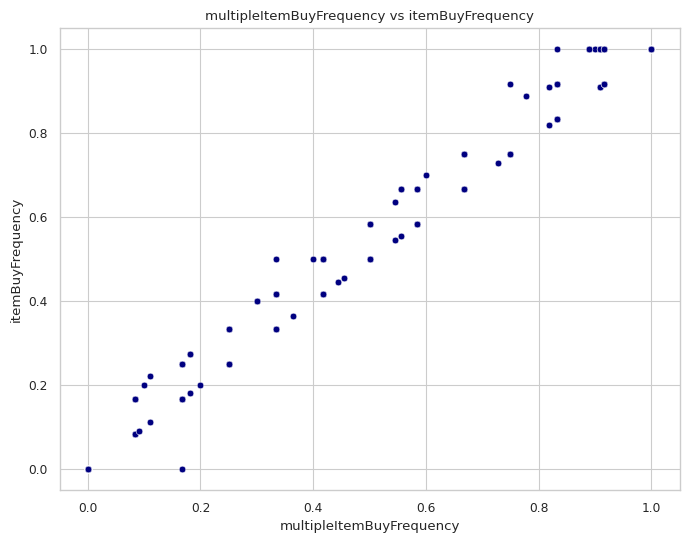

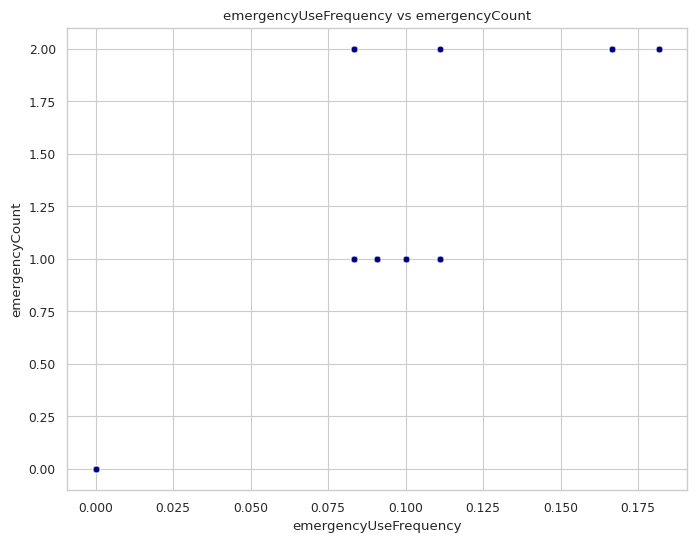

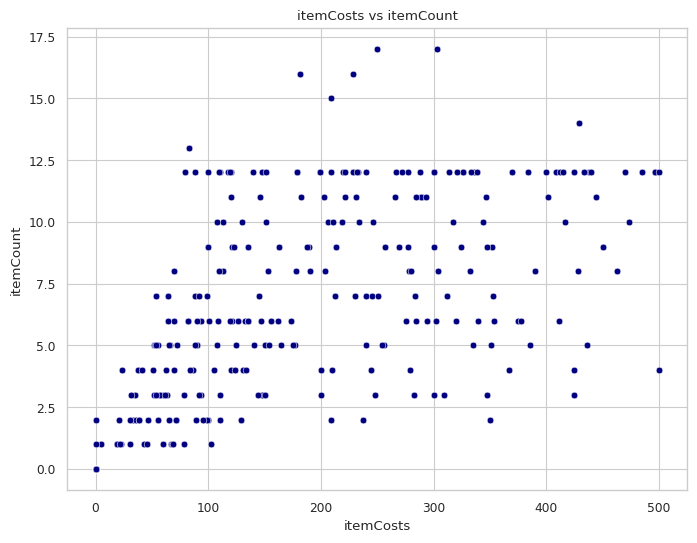

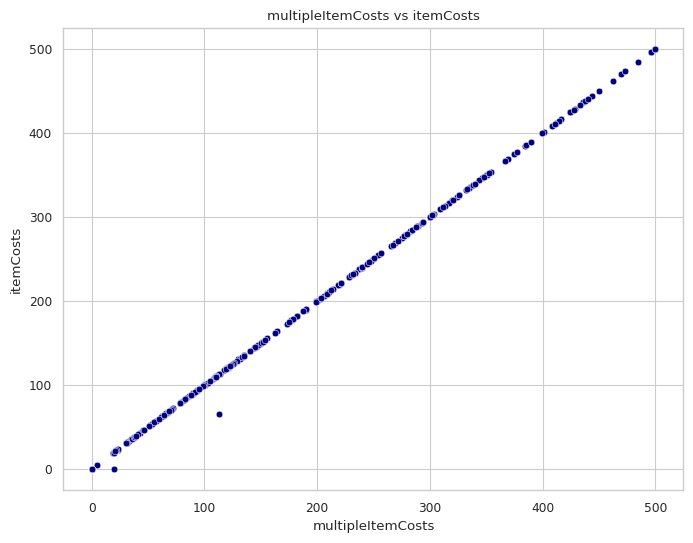

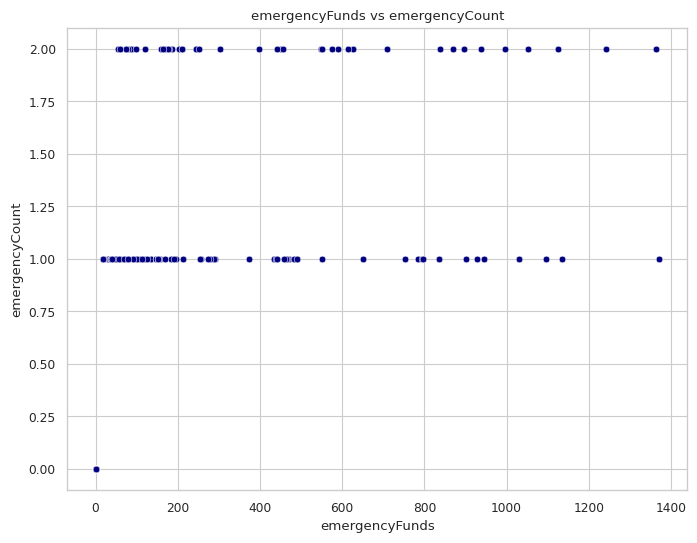

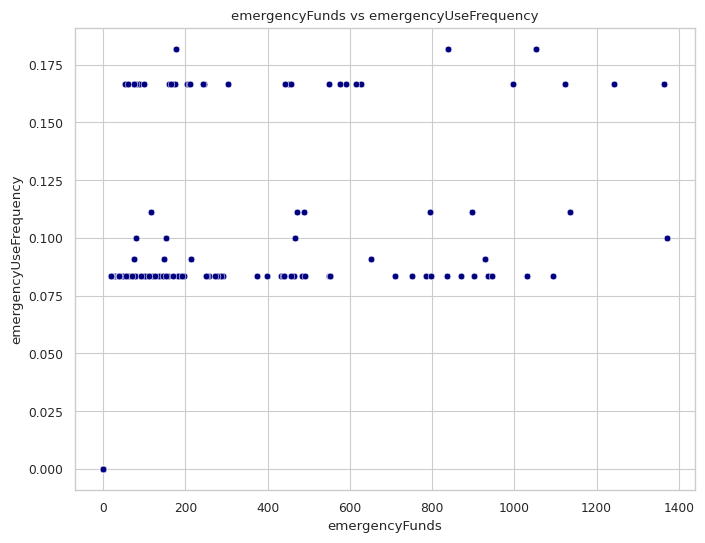

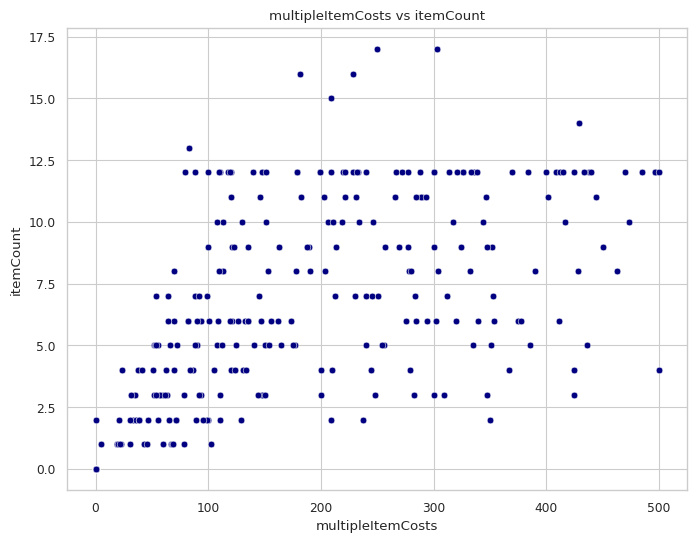

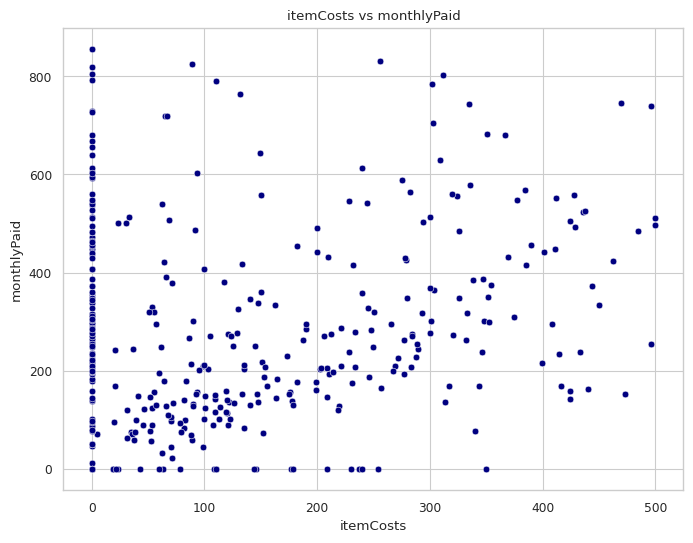

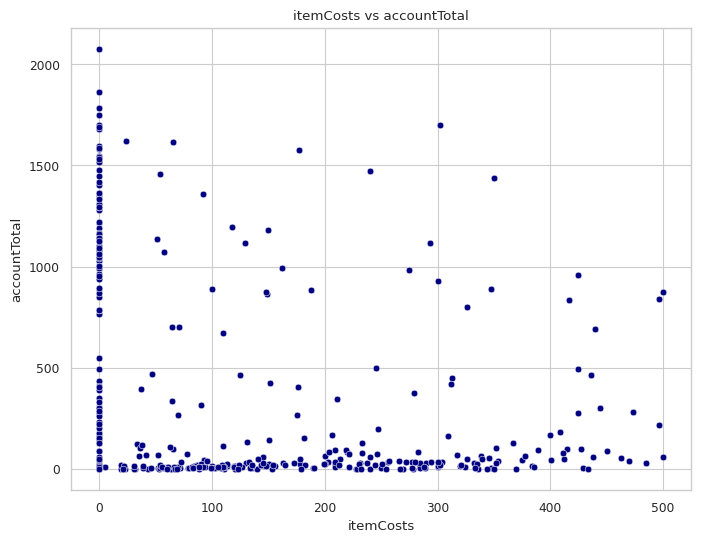

In [ ]:
# Create a DataFrame from the correlation matrix
corr_df = pd.DataFrame(np.abs(encoded_df.corr()))

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

# Select variables with high correlation coefficients for pairwise scatter plots
high_corr_vars = corr_df[corr_df > 0.6]
high_corr_vars = high_corr_vars[high_corr_vars < 1.0]
high_corr_vars = high_corr_vars.dropna(axis=1, how='all')
high_corr_pairs = high_corr_vars.unstack().sort_values(ascending=False).drop_duplicates()

# Plot pairwise scatter plots for strongly correlated variables
for var1, var2 in high_corr_pairs.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[var1], y=df[var2], color='navy')
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

This correlation heatmap displays the relationships between various metrics within the ShopEasy dataset. Each cell color indicates the strength of correlation, with warmer colors (orange to yellow) showing higher positive correlations, and cooler colors (purple) indicating lower correlations. Notable strong correlations are seen between related purchasing behaviors such as item costs and single/multiple item buy frequencies.
1. Monthly payment amounts versus item costs—demonstrating variability without a clear trend.
2. Item costs versus account totals—mostly lower account balances with varied item costs.
3. Emergency fund amounts versus emergency use frequency—displaying a pattern where increased funds correlate with more frequent uses.
4. Multiple item costs versus item counts—indicating that higher costs generally involve more items.
5. Multiple item costs directly correlating with total item costs, which aligns with expectations.



# Implementing clustering

## K-Means clustering

### StandardScaler
We first used StandardScaler, not aware of its detriments. The resulting analysis was skewed by using StandardScaler, which wasn't suitable for our data. The data has a lot of outliers, and StandardScaler is not suitable for data with a lot of outliers and the results come out skewed. Therefore the first time the elbow method was indicative of using 4 clusters.

The results were not satisfactory, the silhouette score was only 0.1 which is very small. The cluster visualisation provided not clear picture of the clusters, overall bad quality of the clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

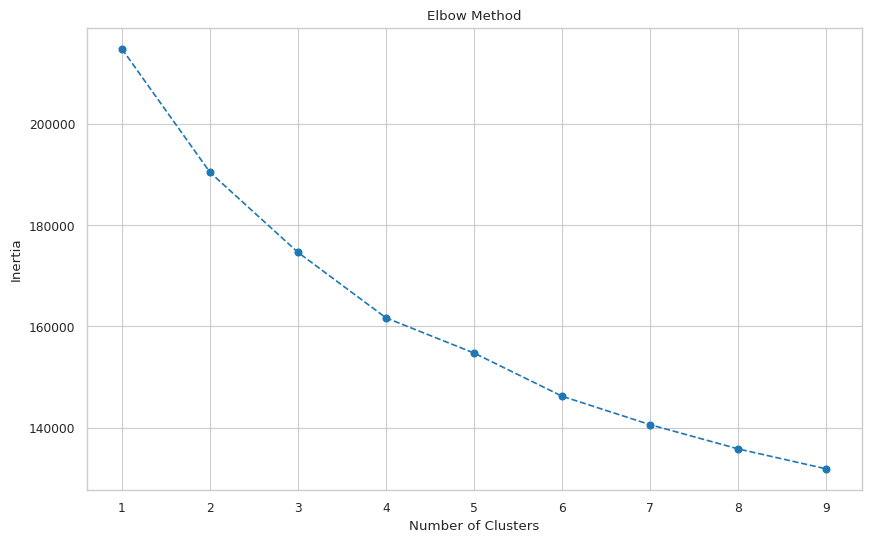

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.10832150554655705
         accountTotal  frequencyIndex    itemCosts  singleItemCosts  \
cluster                                                               
0         3546.199564        0.986911  7688.954317      5103.549951   
1          895.923270        0.935471  1236.228673       592.937295   
2         4579.175205        0.968640   492.797263       313.748326   
3         1003.909824        0.788965   272.615544       211.666714   

         multipleItemCosts  emergencyFunds  itemBuyFrequency  \
cluster                                                        
0              2586.867780      692.064543          0.946345   
1               643.566737      208.493279          0.886388   
2               179.132754     4479.629602          0.284241   
3                61.215986      589.904711          0.172066   

         singleItemBuyFrequency  multipleItemBuyFrequency  \
cluster                                                     
0                      0.736

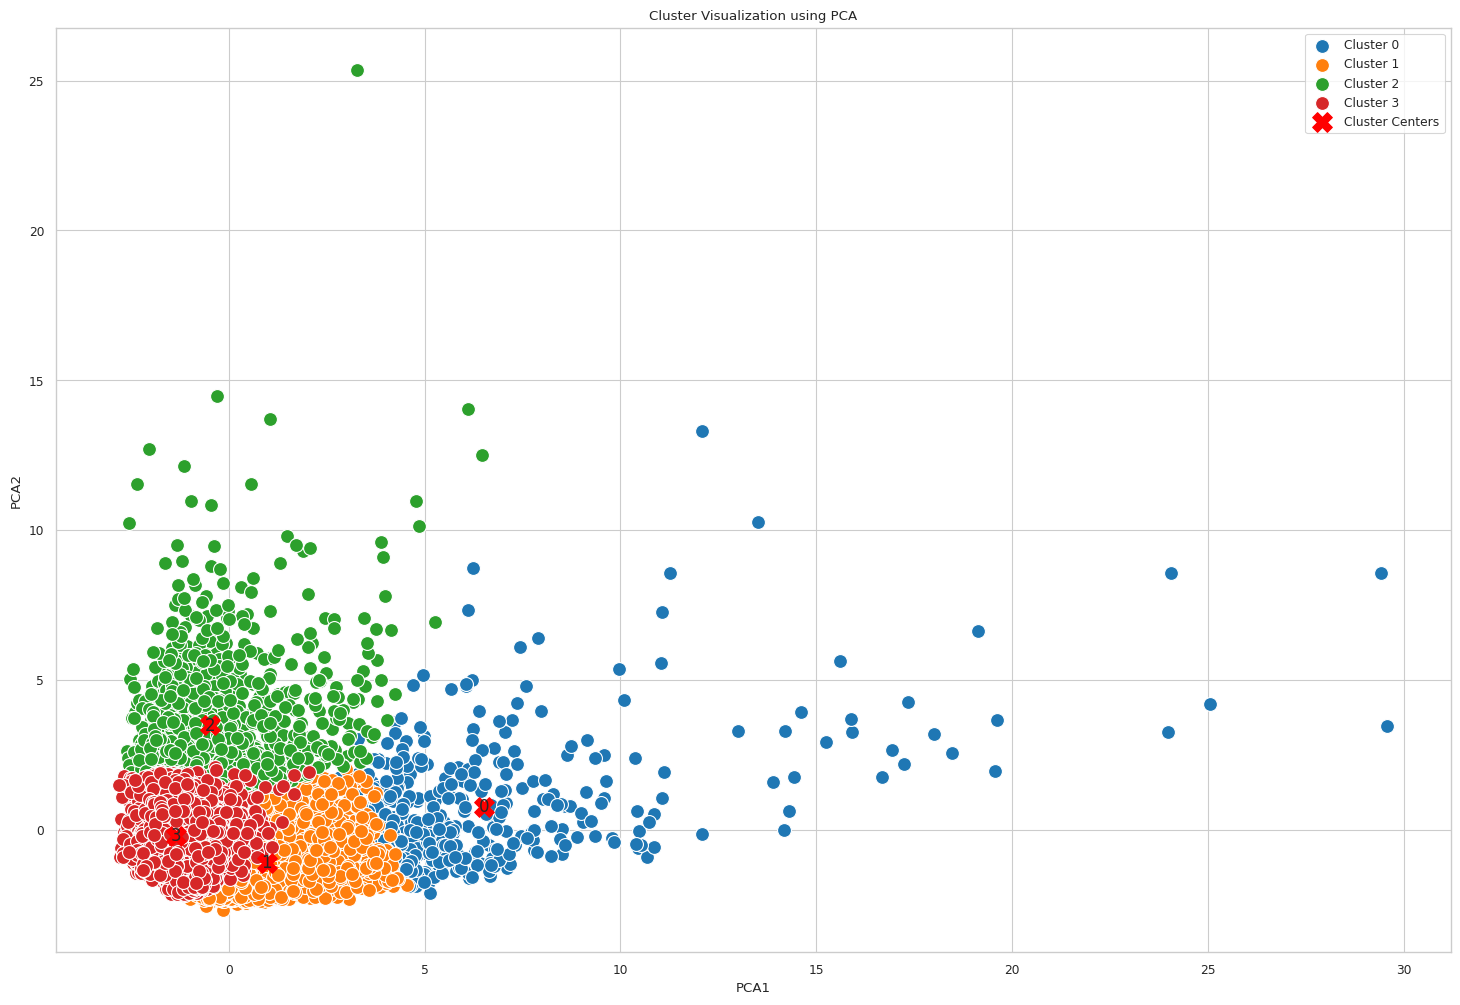

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Use StandardScaler to standardize features, drop 'cluster' if it exists
scaler = StandardScaler()
features = encoded_df.drop('cluster', axis=1, errors='ignore')
features_scaled = scaler.fit_transform(features)

#Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#Optimal n of clusters is 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
encoded_df['cluster'] = kmeans.fit_predict(features_scaled)

#Calculate and print silhouette score
silhouette_avg = silhouette_score(features_scaled, encoded_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

#Print segment properties of each cluster: mean values of each feature to analyze clusters
segment_properties = encoded_df.groupby('cluster').mean()
print(segment_properties)

#Calculate cluster centers
cluster_centers = kmeans.cluster_centers_

#Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

#Create df for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = encoded_df['cluster']

#Visualise clusters using PCA
plt.figure(figsize=(18, 12))

for cluster in range(n_clusters):
    sns.scatterplot(
        data=pca_df[pca_df['cluster'] == cluster],
        x='PCA1',
        y='PCA2',
        label=f'Cluster {cluster}',
        s=100
    )

#Draw cluster centers
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

for i, center in enumerate(cluster_centers_pca):
    plt.text(center[0], center[1], str(i), fontsize=12, ha='center', va='center')

plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

The first visualization employs Principal Component Analysis (PCA) to reduce dimensionality for effective visualization of K-means clustering results. It plots the first two principal components, showing data points grouped into four distinct clusters, each color-coded. Cluster centers are marked with red 'X' symbols, illustrating the centroids of the respective clusters. This visualization aids in assessing the clustering algorithm's effectiveness by observing the spatial distribution and overlap between clusters.

The second plot utilizes the Elbow Method to optimize the number of clusters for K-means clustering. It graphs the cluster count against inertia (sum of squared distances of samples to their closest cluster center). The plot shows a discernible elbow at four clusters, suggesting that increasing the number of clusters beyond this point yields diminishing returns in terms of intra-cluster variance reduction. This method helps in selecting a cluster count that balances complexity and explanatory power of the clustering model.

### RobustScaler

Therefore we changed the scaling to RobustScaler to accomodate large number of outliers in the data. Repeating the clustering process from the start:


Preparing the data. Scaling the data using RobustScaler because the data has a lot of outliers and RobustScaler is better at handling outliers than StandardScaler.

In [ ]:
#Importing libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Use StandardScaler to standardize features, drop 'cluster' if it exists
scaler = RobustScaler()
features = encoded_df.drop('cluster', axis=1, errors='ignore')
features_scaled = scaler.fit_transform(features)

#### Elbow method to find the right number of clusters.

Iterate through 1-9 number of clusters and calculate the inertia for each number of clusters and plot it. The elbow point is where the inertia starts to decrease at a slower rate. The elbow point is not fully clear, but **3** is most likely it.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

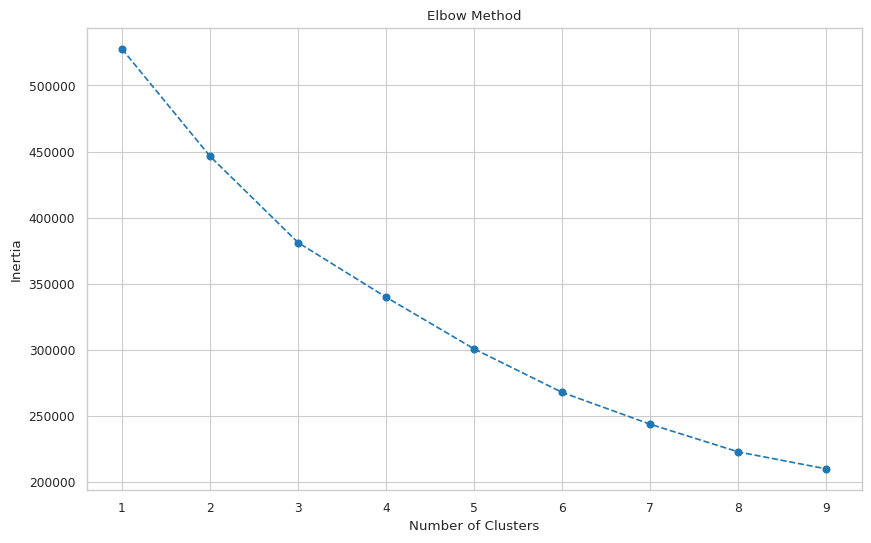

In [ ]:
#Elbow method

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Silhouette analysis
Using elbow method alone does not give us clear number of clusters, therefore we can use Silhouette analysis.
Iterating through 1-10 number of clusters, calculate silhouette score for each of them. The number of clusters with the highest silhouette score is the right number of clusters for the model. We see that **2** has the highest silhouette score. **3** is the next likely number of clusters.

Based on both elbow method and silhouette analysis, 3 is the most preferable number of clusters. 2 is too low of a number for clusters because having only two clusters oversimplifies the dataset, obscuring important patterns and variations. It might lead to misinterpretation and limit the usefulness of the clustering analysis for understanding and decision-making. Therefore **3 is a number of clusters in the model.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

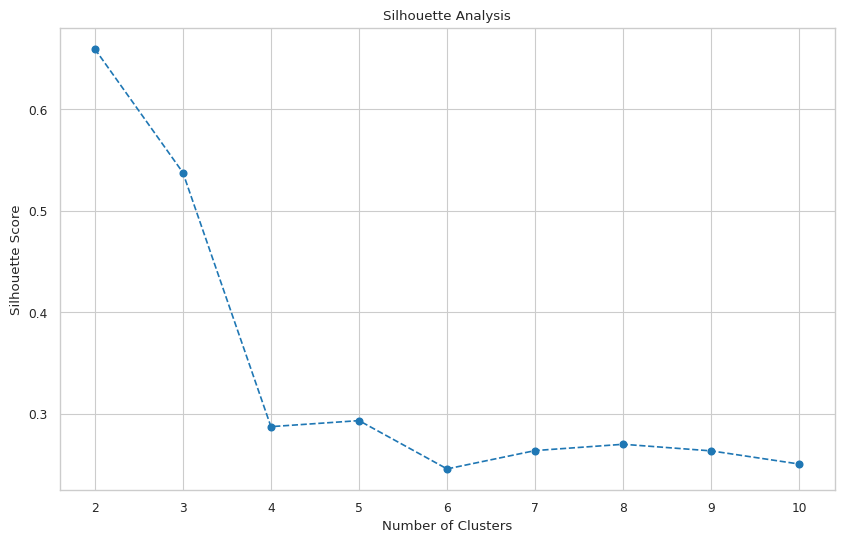

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already imported necessary libraries and have your data ready

# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Assuming you want to evaluate clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

Building the model using k-means. Using 3 as a number of clusters.
- Calculating the silhouette score of the resulting clusters. **The silhouette score is 0.537**, which is a major improvement from the previous model.
- We calculated segment_properties that prints mean values of features for each cluster. This way we can see the differences and describe the clusters and analyse them.
- Used PCA for dimension reduction because we have a lot of features. Dimension reduction is useful for visualisation of clusters in a 2D plot, noise reduction, cluster analysis to see how well the clusters are separated.

The resulting plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5374989418407079
         accountTotal  frequencyIndex    itemCosts  singleItemCosts  \
cluster                                                               
0         3118.141220        0.977522  6904.437369      4757.124159   
1         1447.006664        0.870277   635.736436       337.178943   
2         4569.731724        0.989394  1434.466000       328.033167   

         multipleItemCosts  emergencyFunds  itemBuyFrequency  \
cluster                                                        
0              2148.473752     1250.940063          0.922032   
1               298.806702      959.103615          0.463610   
2              1106.432833     1393.097977          0.502399   

         singleItemBuyFrequency  multipleItemBuyFrequency  \
cluster                                                     
0                      0.726315                  0.720225   
1                      0.171071                  0.341782   
2                      0.068561           

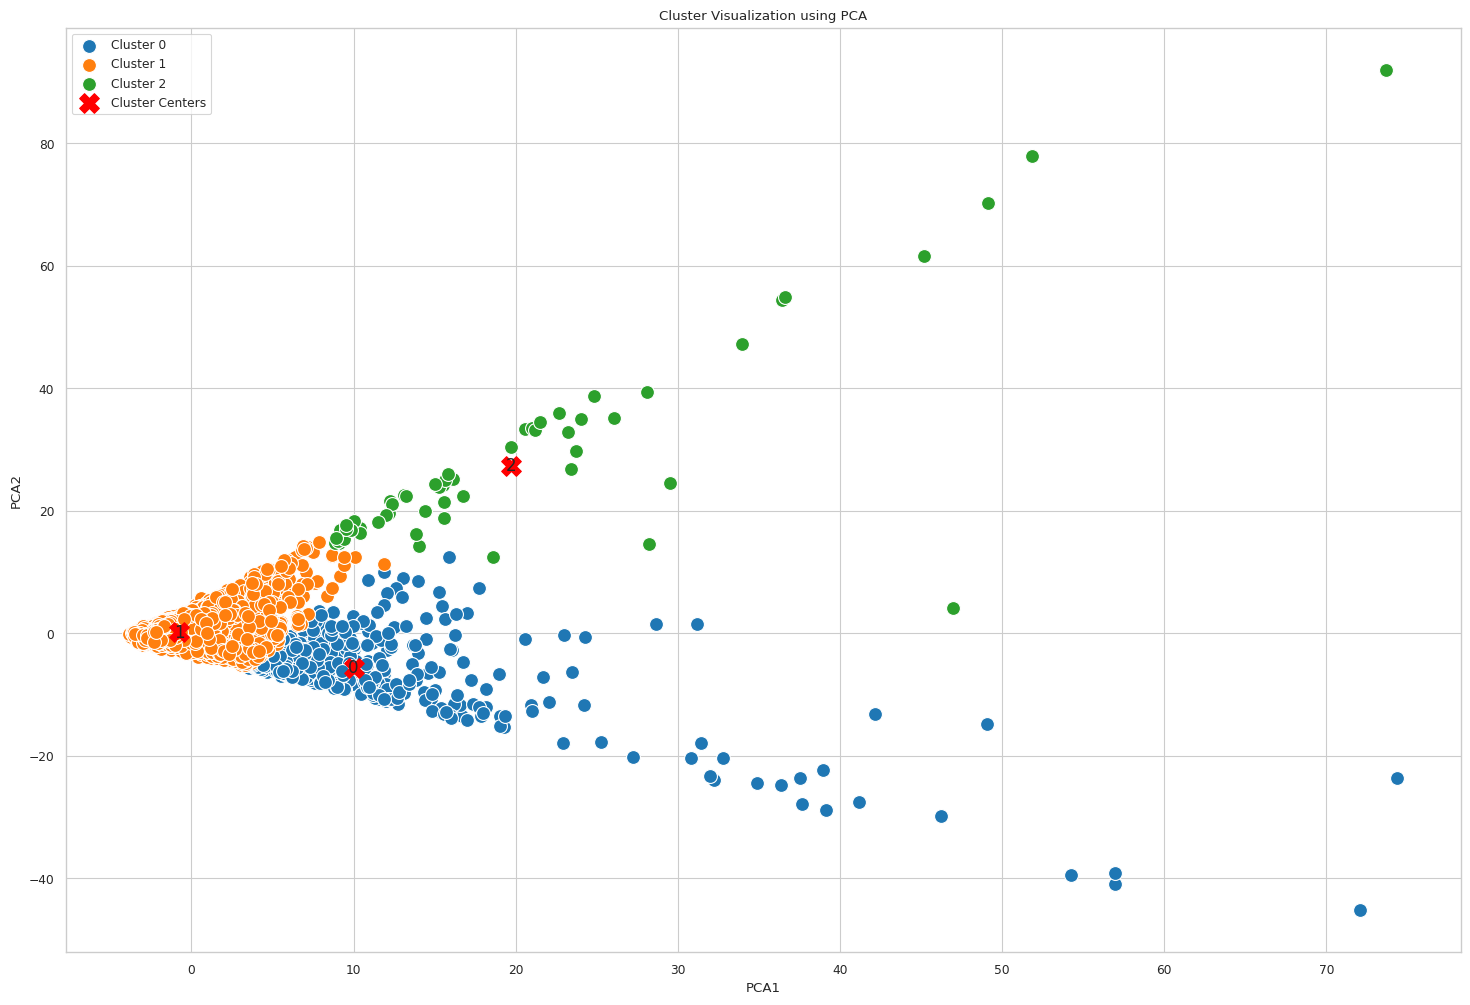

In [ ]:
#3 is the right number of clusters
n_clusters = 3

#Doing k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
encoded_df['cluster'] = kmeans.fit_predict(features_scaled)

#Calculating silhouette score of the result
silhouette_avg = silhouette_score(features_scaled, encoded_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

#Calculating mean values for each features for each cluster to analyse clusters features
segment_properties = encoded_df.groupby('cluster').mean()
print(segment_properties)

#Calculating cluster centers
cluster_centers = kmeans.cluster_centers_

#PCA for dimension reduction to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

#Create df for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = encoded_df['cluster']

plt.figure(figsize=(18, 12))

for cluster in range(n_clusters):
    sns.scatterplot(
        data=pca_df[pca_df['cluster'] == cluster],
        x='PCA1',
        y='PCA2',
        label=f'Cluster {cluster}',
        s=100
    )


cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

for i, center in enumerate(cluster_centers_pca):
    plt.text(center[0], center[1], str(i), fontsize=12, ha='center', va='center')

plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Cluster analysis

### Cluster 0: High Spenders and Frequent Buyers

#### Defining Features:
- **High Account Total**: The average account total is 3118.14, which is quite high.
- **High Item Costs**: Total item costs are 6904.44, with single item costs at 4757.12.
- **High Multiple Item Costs**: 2148.47, the highest among the clusters.
- **High Emergency Funds**: Emergency funds are at 1250.94, indicating substantial savings for emergencies.
- **Frequent Item Purchases**: Item buy frequency is 0.92, with single item buy frequency at 0.73 and multiple item buy frequency at 0.72.
- **Moderate Emergency Use Frequency**: At 0.09, relatively low compared to Clusters 1 and 2.
- **High Payment Completion Rate**: At 0.32, significantly higher than the other clusters.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (35.40%), Los Angeles (31.33%), New York (33.27%).
  - Account Types: Premium (34.04%), Regular (29.98%), Student (35.98%).

#### Summary:
Cluster 0 represents high spenders and frequent buyers with high item costs, substantial emergency funds, and high payment completion rates. They are well-distributed across locations and tend to have a higher percentage of premium and student account types.

### Cluster 1: Low Spenders and Infrequent Buyers

#### Defining Features:
- **Low Account Total**: The average account total is 1447.01, the lowest among the clusters.
- **Low Item Costs**: Total item costs are 635.74, with single item costs at 337.18.
- **Low Multiple Item Costs**: 298.81, the lowest among the clusters.
- **Moderate Emergency Funds**: Emergency funds are at 959.10.
- **Infrequent Item Purchases**: Item buy frequency is 0.46, with single item buy frequency at 0.17 and multiple item buy frequency at 0.34.
- **Highest Emergency Use Frequency**: At 0.14, the highest among the clusters.
- **Low Payment Completion Rate**: At 0.14, lower than Cluster 0 but higher than Cluster 2.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (33.33%), Los Angeles (33.19%), New York (33.48%).
  - Account Types: Premium (33.50%), Regular (33.68%), Student (32.82%).

#### Summary:
Cluster 1 represents low spenders and infrequent buyers with low item costs, moderate emergency funds, and the highest emergency use frequency. This cluster is evenly distributed across locations and account types.

### Cluster 2: High Account Total with Very Low Payment Completion

#### Defining Features:
- **Highest Account Total**: The average account total is 4569.73, the highest among the clusters.
- **Moderate Item Costs**: Total item costs are 1434.47, with single item costs at 328.03.
- **Moderate Multiple Item Costs**: 1106.43, moderate compared to the other clusters.
- **High Emergency Funds**: Emergency funds are at 1393.10, the highest among the clusters.
- **Moderate Item Purchases**: Item buy frequency is 0.50, with single item buy frequency at 0.07 and multiple item buy frequency at 0.46.
- **High Emergency Use Frequency**: At 0.13, slightly lower than Cluster 1.
- **Very Low Payment Completion Rate**: At 0.003, significantly lower than the other clusters.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (30.00%), Los Angeles (33.33%), New York (36.67%).
  - Account Types: Premium (31.67%), Regular (33.33%), Student (35.00%).

#### Summary:
Cluster 2 represents users with the highest account totals and emergency funds but moderate item costs and very low payment completion rates. This cluster has a higher representation from New York and a balanced distribution across premium, regular, and student account types.

### Differences and Insights:

- **Cluster 0**: High spenders and frequent buyers with high item costs and substantial emergency funds. They have high payment completion rates and are well-distributed across account types, particularly premium and student accounts.
- **Cluster 1**: Low spenders and infrequent buyers with low item costs and moderate emergency funds. They have the highest emergency use frequency and a balanced distribution across locations and account types.
- **Cluster 2**: Users with the highest account totals and emergency funds but moderate item costs and very low payment completion rates. This cluster has a higher representation from New York and a significant proportion of student accounts.

## Hierarchical clustering

Implementing another clustering algorithm to determine which one is better suited for the data. Experimentation.

###Data preprocessing
Drop existing clusters and use RobustScaler for scaling.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

features = encoded_df.drop('cluster', axis=1, errors='ignore')

scaler = RobustScaler()
features_scaled = scaler.fit_transform(features)

### Dendrogram
Drawing a dendrogram to determine the right number of clusters.

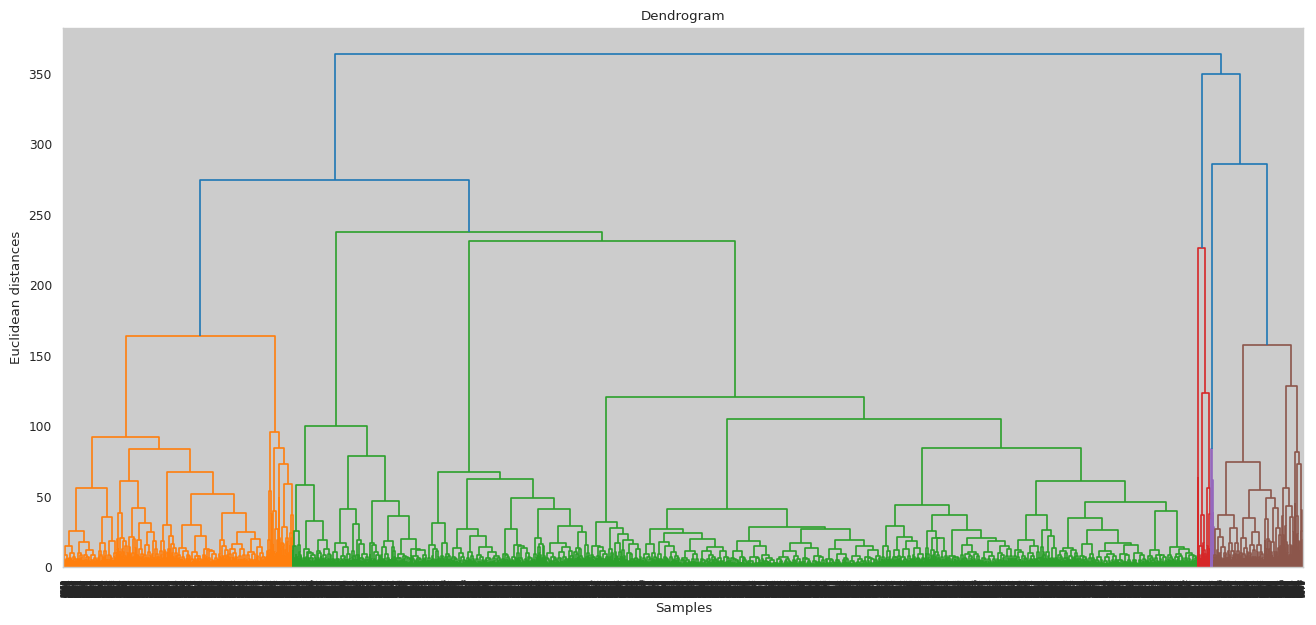

In [ ]:
plt.figure(figsize=(16, 7))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

### Silhouette score plot
Doing silhouette score analysis for each number of clusters to further determine the appropriate number of clusters. Highest silhouette score is 2 clusters with value of 0.488, then 3 clusters with score of 0.448, then 4 clusters with the value of 0.407, then the silhouette score decrease drastically.
We choose 3 as a number of clusters because 2 is too little and doesnt provide much insight, and 4 has significantly lower silhouette score. Also keeping the same number of clusters in a hierarchical algorithm can provide better insight into which of the two algorithms is better to use for our model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.4888039251900799


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.4486352961813179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.40761687478584013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.2271523226927573


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 6, Silhouette Score: 0.21864550860419893


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 7, Silhouette Score: 0.2161433992549009


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.21800207983466582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 9, Silhouette Score: 0.21438682346289142


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters: 10, Silhouette Score: 0.2179900735492627


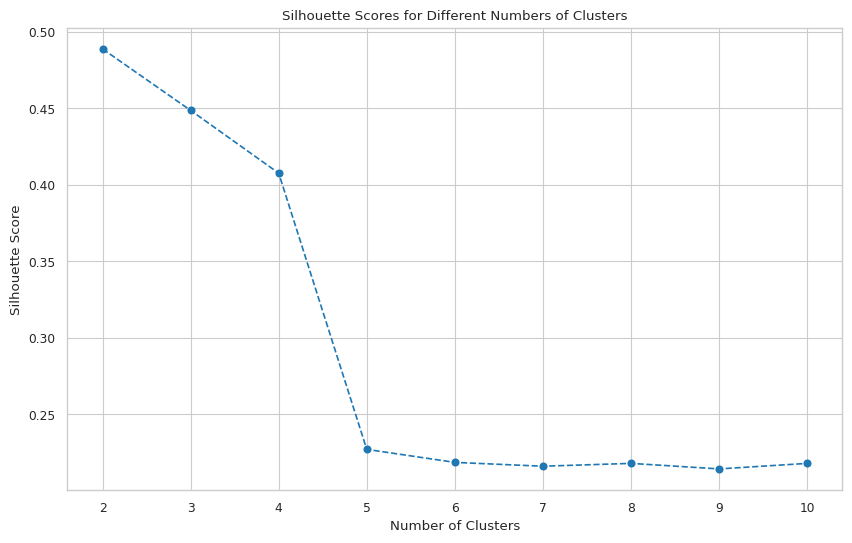

Optimal number of clusters based on silhouette score: 2


In [ ]:
import scipy.cluster.hierarchy as sch

# Function to calculate silhouette scores for a range of cluster numbers
def calculate_silhouette_scores(data, range_n_clusters):
    silhouette_scores = {}
    for n_clusters in range_n_clusters:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        cluster_labels = clustering.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores[n_clusters] = silhouette_avg
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
    return silhouette_scores

# Range of cluster numbers to evaluate
range_n_clusters = range(2, 11)

# Calculate silhouette scores for the range of cluster numbers
silhouette_scores = calculate_silhouette_scores(features_scaled, range_n_clusters)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

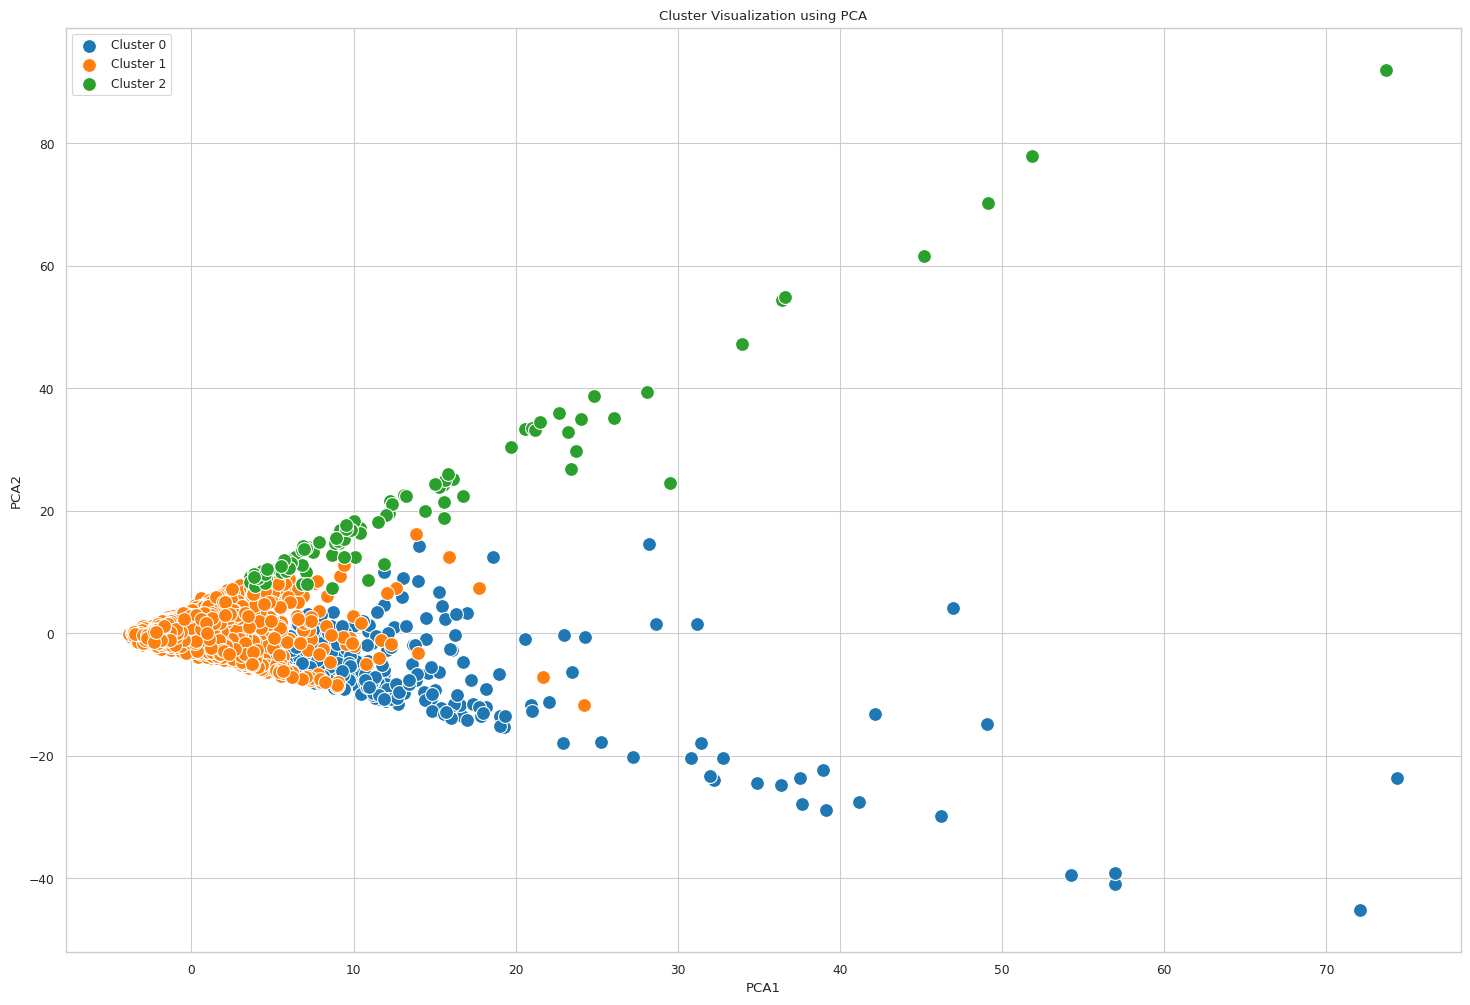

         accountTotal  frequencyIndex    itemCosts  singleItemCosts  \
cluster                                                               
0         3197.783495        0.980586  5770.433253      3786.110915   
1         1412.403982        0.867542   618.742896       337.516699   
2         3148.995154        0.986601   667.282449       146.982755   

         multipleItemCosts  emergencyFunds  itemBuyFrequency  \
cluster                                                        
0              1985.295352      573.850906          0.907776   
1               281.475144     1011.433009          0.456753   
2               520.299694     1015.905365          0.455359   

         singleItemBuyFrequency  multipleItemBuyFrequency  \
cluster                                                     
0                      0.645898                  0.724273   
1                      0.168189                  0.334449   
2                      0.046511                  0.419980   

         emergenc

In [ ]:
n_clusters = 3

#Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
encoded_df['cluster'] = hc.fit_predict(features_scaled)

#PCA for dimension reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = encoded_df['cluster']

#Visualise clusters using PCA
plt.figure(figsize=(18, 12))

for cluster in range(n_clusters):
    sns.scatterplot(
        data=pca_df[pca_df['cluster'] == cluster],
        x='PCA1',
        y='PCA2',
        label=f'Cluster {cluster}',
        s=100
    )

plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

#Means of features to analyse clusters
segment_properties = encoded_df.groupby('cluster').mean()
print(segment_properties)

#Calculate silhouette score to determine quality of clustering
silhouette_avg = silhouette_score(features_scaled, encoded_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

### Cluster analysis
### Cluster 0

#### Defining Features:
- **High Account Total**: The average account total is 3197.78, the highest among the clusters.
- **High Item Costs**: Both total item costs (5770.43) and single item costs (3786.11) are significantly higher than in the other clusters.
- **High Multiple Item Costs**: 1985.30, again the highest among the clusters.
- **High Emergency Funds**: Though lower than Cluster 1 and 2, it is notable at 573.85.
- **Frequent Item Purchases**: Item buy frequency is 0.91, with single item buy frequency at 0.65 and multiple item buy frequency at 0.72.
- **Low Emergency Use Frequency**: At 0.08, this is the lowest among the clusters.
- **Payment Completion Rate**: At 0.16, slightly higher than Cluster 1 but significantly higher than Cluster 2.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (34.18%), Los Angeles (31.03%), New York (34.78%).
  - Account Types: Premium (34.18%), Regular (30.88%), Student (34.93%).

#### Summary:
Cluster 0 represents users with high account totals, high item costs, frequent purchases, and moderate emergency fund usage. They are distributed relatively evenly across locations and account types, with a slightly higher representation of premium accounts.

### Cluster 1

#### Defining Features:
- **Low Account Total**: The average account total is 1412.40, the lowest among the clusters.
- **Low Item Costs**: Both total item costs (618.74) and single item costs (337.52) are the lowest.
- **Low Multiple Item Costs**: 281.48, also the lowest.
- **High Emergency Funds**: 1011.43, the highest among the clusters.
- **Infrequent Item Purchases**: Item buy frequency is 0.46, with single item buy frequency at 0.17 and multiple item buy frequency at 0.33.
- **High Emergency Use Frequency**: At 0.14, the highest among the clusters.
- **Payment Completion Rate**: At 0.15, similar to Cluster 0 but higher than Cluster 2.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (33.41%), Los Angeles (33.24%), New York (33.34%).
  - Account Types: Premium (33.45%), Regular (33.67%), Student (32.88%).

#### Summary:
Cluster 1 represents users with the lowest account totals and item costs, frequent use of emergency funds, and infrequent purchases. They have the highest emergency use frequency and a balanced distribution across locations and account types.

### Cluster 2

#### Defining Features:
- **Moderate Account Total**: The average account total is 3148.99, higher than Cluster 1 but slightly lower than Cluster 0.
- **Moderate Item Costs**: Total item costs (667.28) and single item costs (146.98) are moderate.
- **Moderate Multiple Item Costs**: 520.30, again moderate.
- **High Emergency Funds**: 1015.91, slightly higher than Cluster 1.
- **Infrequent Item Purchases**: Item buy frequency is 0.46, similar to Cluster 1, with single item buy frequency at 0.05 and multiple item buy frequency at 0.42.
- **Moderate Emergency Use Frequency**: At 0.11, between Clusters 0 and 1.
- **Very Low Payment Completion Rate**: At 0.003, significantly lower than the other clusters.
- **Distribution of Locations and Account Types**:
  - Locations: Chicago (29.59%), Los Angeles (33.67%), New York (36.73%).
  - Account Types: Premium (34.69%), Regular (33.67%), Student (31.63%).

#### Summary:
Cluster 2 represents users with moderate account totals, moderate item costs, and frequent use of emergency funds. They have the lowest payment completion rate and are more likely to be from New York and have a premium account type compared to other clusters.

### Differences and insights:

- **Cluster 0**: High spenders and frequent buyers with balanced emergency fund use and high payment completion rate.
- **Cluster 1**: Low spenders, infrequent buyers, high emergency fund use, and the highest emergency use frequency. Balanced distribution across locations and account types.
- **Cluster 2**: Moderate spenders, infrequent buyers, high emergency fund use, and the lowest payment completion rate. More likely to be from New York and have a premium account.

These insights help in tailoring services, marketing strategies, and resource allocation based on the specific needs and behaviors of each cluster.


# K-means Vs. Hierarchical
In conclusion, **k-means is better clustering algorithm for our data** because:
- the silhouette score is significantly higher: 0.537 vs. 0.448.
- the cluster visualisation shows better cluster separation in k-means than in hierarchical

# Conclusion and application

The clustering analysis of customers provides valuable insights for the e-commerce platform 'Shopeasy' by identifying distinct customer segments based on their spending behaviors, purchase frequencies, and other financial metrics. Here’s how each cluster can be useful and the specific insights they provide into the business:

### Cluster 0: High Spenders and Frequent Buyers

#### Characteristics:
- High account totals and item costs.
- Frequent purchases, both single and multiple items.
- Moderate emergency fund use and low emergency use frequency.
- Higher payment completion rate.

#### Insights and Usefulness:
1. **Loyalty Programs**: These customers are likely loyal and high-value, so investing in loyalty programs, exclusive deals, and personalized recommendations can further enhance their engagement.
2. **Premium Services**: Offer premium services or memberships with additional perks, as they are more likely to invest in higher-end products and services.
3. **Targeted Marketing**: Tailor marketing campaigns with a focus on high-value items and premium product lines to appeal to their purchasing behavior.

### Cluster 1: Low Spenders and Infrequent Buyers

#### Characteristics:
- Low account totals and item costs.
- Infrequent purchases with higher emergency fund use and the highest emergency use frequency.
- Balanced distribution across locations and account types.

#### Insights and Usefulness:
1. **Promotional Campaigns**: Design targeted promotions, discounts, and deals to encourage more frequent purchases and increase their overall spending.
2. **Budget-Friendly Options**: Highlight budget-friendly options, payment plans, and small-ticket items to match their spending habits.
3. **Engagement Strategies**: Implement engagement strategies such as email reminders, personalized recommendations, and loyalty rewards for incremental spending.

### Cluster 2: Moderate Spenders with High Emergency Fund Use

#### Characteristics:
- Moderate account totals and item costs.
- Infrequent purchases but high emergency fund use.
- Very low payment completion rate.
- More likely to be from New York and have premium accounts.

#### Insights and Usefulness:
1. **Payment Flexibility**: Introduce flexible payment options, installment plans, or delayed payment schemes to help improve their payment completion rates.
2. **Financial Assistance Programs**: Develop financial assistance programs or targeted offers to help these customers manage their finances better and encourage more consistent spending.
3. **Retention Strategies**: Focus on retention strategies for premium account holders with personalized support, financial advice, and exclusive content to increase their satisfaction and reduce churn.

### General Business Insights:

1. **Customer Segmentation**: The analysis helps in understanding distinct customer segments, allowing Shopeasy to tailor its offerings, communication, and marketing strategies effectively.
2. **Resource Allocation**: Identifying high-value and low-value customer segments enables efficient allocation of resources to maximize return on investment.
3. **Product Development**: Insights into spending habits and preferences can guide product development and inventory management, ensuring that popular and high-demand products are always available.
4. **Personalized Marketing**: By understanding the unique characteristics of each cluster, Shopeasy can create personalized marketing campaigns that resonate with different customer segments, enhancing customer experience and loyalty.
5. **Financial Planning**: Insights into payment behaviors and emergency fund usage can inform financial planning, risk management, and the development of customer-centric financial solutions.

Overall, clustering analysis provides Shopeasy with actionable insights to enhance customer satisfaction, increase sales, and improve operational efficiency by catering to the specific needs and behaviors of different customer segments.